In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv('Height-Weight Data.csv')
df

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671


In [3]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [4]:
df.tail()

,Height,Weight
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671
3500,72.738970,187.222909


In [5]:
df.Height.head(3)

0    73.847017
1    68.781904
2    74.110105
Name: Height, dtype: float64

In [6]:
df['Weight'].head(3)

0    241.893563
1    162.310473
2    212.740856
Name: Weight, dtype: float64

In [7]:
df[5:6]

,Height,Weight
5,67.253016,152.212156


In [8]:
df[4:10]

,Height,Weight
4,69.881796,206.349801
5,67.253016,152.212156
6,68.785081,183.927889
7,68.348516,167.971111
8,67.018950,175.929440
9,63.456494,156.399676


In [9]:
df.mean()

Height     69.024411
Weight    186.891258
dtype: float64

In [10]:
df.Height.mean()

69.02441087268797

In [11]:
df.describe()

,Height,Weight
count,3501.000000,3501.000000
mean,69.024411,186.891258
std,2.858583,19.903132
min,59.380650,65.780000
25%,67.193523,173.896237
50%,69.044211,187.308370
75%,70.976491,200.356448
max,78.998742,269.989698


In [12]:
df.Height.std()

2.8585833281420983

In [13]:
df.shape

(3501, 2)

In [14]:
row,col=df.shape

In [15]:
row

3501

In [16]:
col

2

In [17]:
df.isnull().sum()

Height    0
Weight    0
dtype: int64

# Vizualisation

Text(0.5, 1.0, 'HW plot')

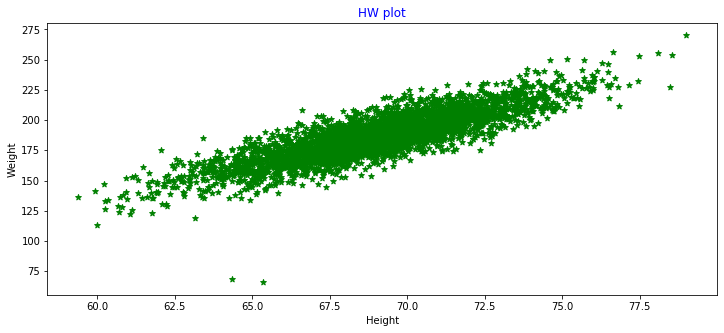

In [18]:
plt.figure(figsize=(12,5))
plt.scatter(df.Height , df.Weight, marker='*' , color='green')
plt.xlabel('Height', color='black')
plt.ylabel('Weight')
plt.title('HW plot',color='blue')

In [19]:
x=df['Height']
y=['Weight']

In [20]:
x.head()

0    73.847017
1    68.781904
2    74.110105
3    71.730978
4    69.881796
Name: Height, dtype: float64

In [22]:
x=df[['Height']]
y=df['Weight']

In [23]:
x.head()

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


# Split the dataset into train and test

In [24]:
from sklearn.model_selection import train_test_split as tts

In [25]:
xtrain,xtest,ytrain,ytest=tts(x,y,test_size=.30)

In [27]:
xtrain.head()

,Height
2369,63.714951
2313,67.581127
1375,63.408948
1973,66.863040
2492,69.260292


In [28]:
ytrain.head()

2369    139.411145
2313    180.853936
1375    163.074353
1973    189.409124
2492    197.411782
Name: Weight, dtype: float64

# Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
reg=LinearRegression()

In [32]:
reg.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
m=reg.coef_
m

array([5.93613636])

In [35]:
c=reg.intercept_
c

-222.71862048624584

In [40]:
x1=63.71
y=m*x1+c

In [41]:
y

array([155.47262716])

In [42]:
reg.predict([[63.71]])

array([155.47262716])

In [43]:
pred=reg.predict(xtest)

In [44]:
pred

array([160.31853829, 187.80613346, 198.78712232, ..., 206.98386027,
       173.17817066, 181.3770306 ])

In [45]:
df['predicted result']=reg.predict(x)

In [46]:
df.head()

,Height,Weight,predicted result
0,73.847017,241.893563,215.647342
1,68.781904,162.310473,185.580141
2,74.110105,212.740856,217.209071
3,71.730978,220.042470,203.086249
4,69.881796,206.349801,192.109249


In [47]:
x1=73.84
y=m*x1+c

In [48]:
y

array([215.60568851])

In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [50]:
mse=mean_squared_error(ytest,pred)
mse

105.71183135492973

In [52]:
mae=mean_absolute_error(ytest,pred)
mae

8.163253189154737

# Best fit line

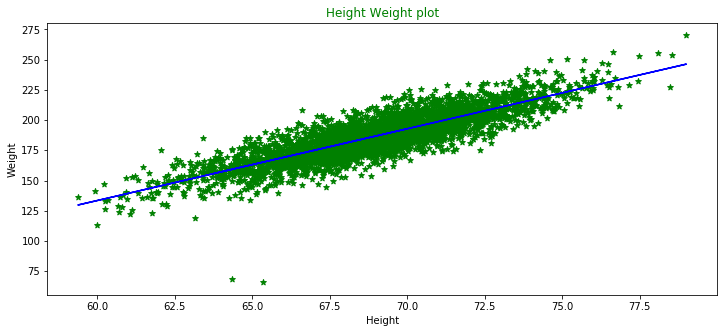

In [55]:
plt.figure(figsize=(12,5))
plt.scatter(df.Height,df.Weight,marker='*',color='green')
plt.xlabel('Height',color='black')
plt.ylabel('Weight')
plt.title('Height Weight plot',color='green')
plt.plot(xtrain,reg.predict(xtrain),color='blue')

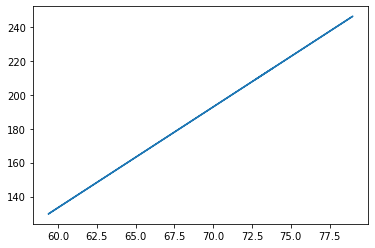

In [56]:
plt.plot(df.Height,reg.predict(df[['Height']]))

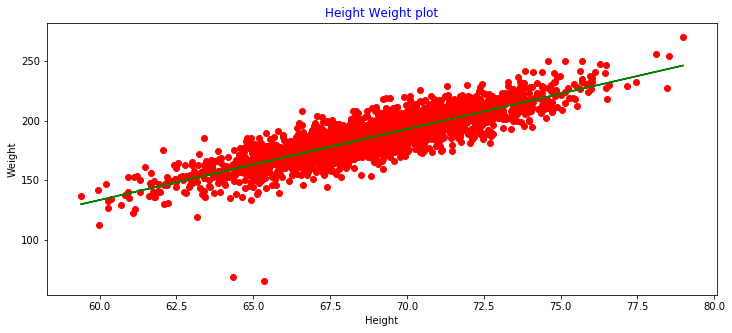

In [62]:
plt.figure(figsize=(12,5))
plt.xlabel('Height',color='black')
plt.ylabel('Weight')
plt.title('Height Weight plot',color='blue')
plt.plot(xtrain,reg.predict(xtrain),color='green')
plt.scatter(xtrain,ytrain,color='red')

In [64]:
import warnings
warnings.filterwarnings('ignore')
reg.predict([[69]])

array([186.87478851])

In [65]:
reg.score(xtest,ytest)

0.7227583797677816

In [66]:
from sklearn.metrics import r2_score
r2_score(ytest,pred)

0.7227583797677816